<a href="https://colab.research.google.com/github/ChristianJFG/Portfolio-GitHub/blob/main/Labs_Batch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
from sklearn.linear_model import LinearRegression # ML model, regresion
import matplotlib.pyplot as plt # Graficar
import numpy as np# arreglos
import pandas as pd #dataset

In [ ]:
x = np.array([121, 125, 131, 141, 152, 161]).reshape(-1,1) # area
y = np.array([300, 350, 425, 405,496,517]) # precio de venta en dolares

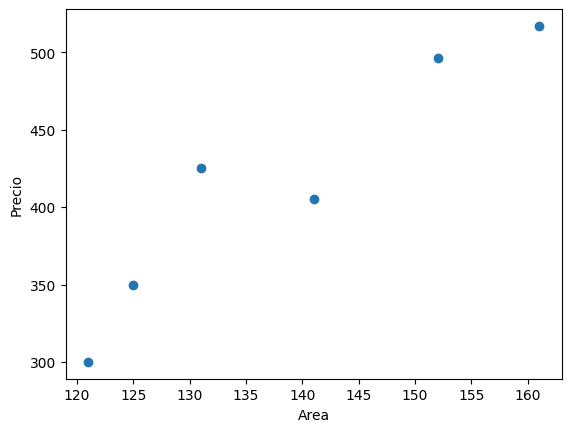

In [ ]:
plt.scatter(x, y)
plt.xlabel('Area')
plt.ylabel('Precio')
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[4.98467124]
-274.8769665187576


In [ ]:
precio = -274.87 + 4.98*150
precio

472.1300000000001

In [ ]:
w = lr.coef_
b = lr.intercept_
print(w)
print(b)

[4.98467124]
-274.8769665187576


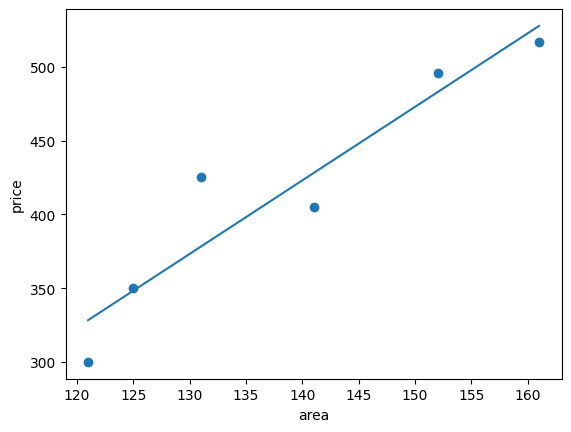

In [ ]:
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])
plt.show()

In [ ]:
testX = np.array([[155]])

In [ ]:
lr.predict(testX)

array([497.74707543])

## Regresion Lineal con Diamonds

In [ ]:
# prompt: importame todas las librerias de ciencia de datos para hacer una regresion lineal con sklearn
import numpy as np
import pandas as pd #dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/unalyticsteam/datasets/master/diamonds.csv'

In [ ]:
data = pd.read_csv(url)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


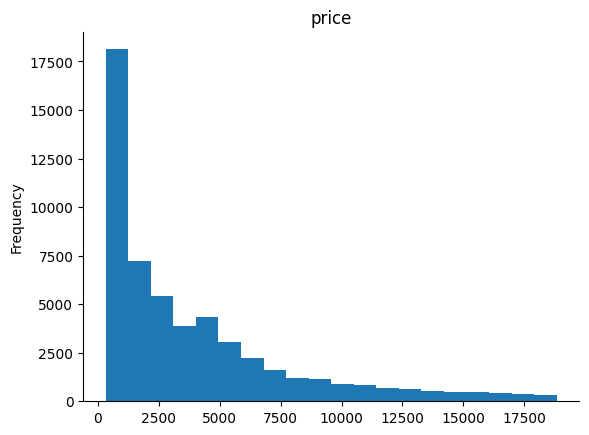

In [ ]:
# @title price

from matplotlib import pyplot as plt
data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

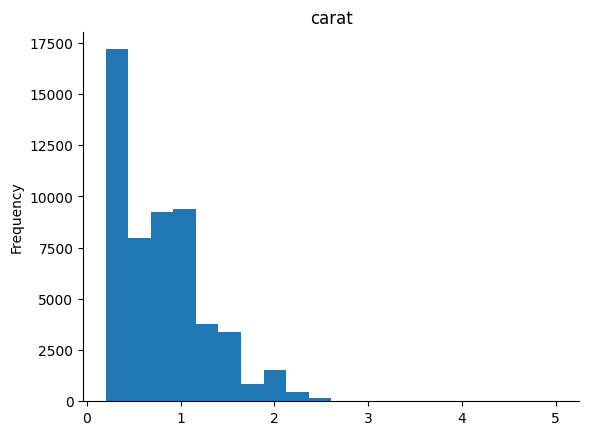

In [ ]:
# @title carat

from matplotlib import pyplot as plt
data['carat'].plot(kind='hist', bins=20, title='carat')
plt.gca().spines[['top', 'right',]].set_visible(False)

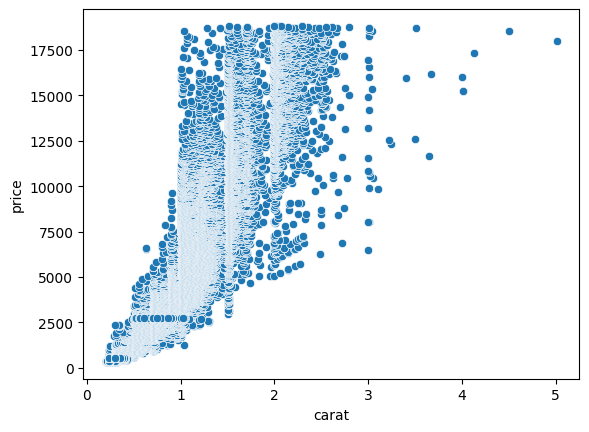

In [ ]:
sns.scatterplot(data=data,  x='carat', y= 'price')
plt.show()

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# prompt: Necesito hacer una regresion lienal para estimar price en funcion de carat y depth, con particion del conjutno de datos

# Select the features and target variable
X = data[['carat', 'depth']] # seleccion de feactures
y = data['price'] # seleccion de la variable respuesta / target / lab(cat)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Print the results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))


Coefficients: [7778.74124426  -99.77691694]
Intercept: 3890.771743834406
R-squared: 0.850562709988032


In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred_train)

2376878.997576289

In [ ]:
mean_squared_error(y_test, y_pred)

2375577.9174803584

In [ ]:
from sklearn.metrics import r2_score
#A mí también me generó esa parte del R^2:

# Evaluate the model on the testing set
r2 = model.score(X_test, y_test)
print(f"R^2 on the testing set: {r2}")

R^2 on the testing set: 0.850562709988032


In [ ]:
r2_score(y_train, y_pred_train)

0.8506961052690057

In [ ]:
# prompt: necesito el r2 para el conjunto de train

y_pred_train = model.predict(X_train)
r2_train = model.score(X_train, y_train)
print(f"R^2 on the training set: {r2_train}")


R^2 on the training set: 0.8506961052690057


In [ ]:
model.score(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2375577.9174803584

## Clasificacion

In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Paso 2: Cargar el conjunto de datos del Titanic desde el enlace proporcionado
url = 'https://raw.githubusercontent.com/unalyticsteam/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos para verificar
titanic_data.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

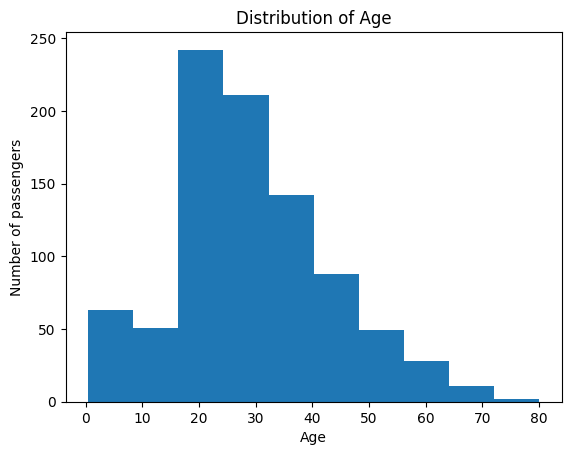

In [ ]:
# prompt: dame un histograma de Age

titanic_data['Age'].plot.hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.title("Distribution of Age")
plt.show()


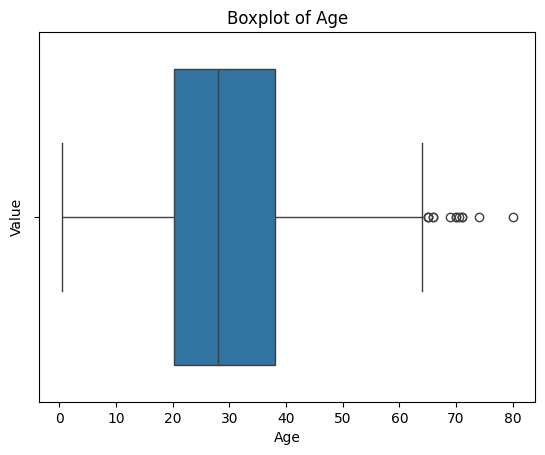

In [ ]:
# prompt: creame un boxplot para la edad

sns.boxplot(x=titanic_data['Age'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Boxplot of Age')
plt.show()


In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace = True)

In [ ]:
le = LabelEncoder()
scaler = StandardScaler()

titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])


In [ ]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [ ]:
X = titanic_data[['Pclass', 'Sex',	'Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
y = titanic_data['Survived']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
titanic_data['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [ ]:
# prompt: divide el conjutno de datos en entrenamiento y prueba un 70% para entrenar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.shape

(620, 6)

In [ ]:
X_test.shape

(267, 6)

In [ ]:
rl = LogisticRegression()

In [ ]:
rl.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# hacer la prediccion
y_pred = rl.predict(X_test)

In [ ]:
0.65547664 + 0.34452336

1.0

In [ ]:
# prompt: necesito la probabilidad de x_test del modelo rl
rl.predict_proba(X_test)

array([[0.6588726 , 0.3411274 ],
       [0.83373422, 0.16626578],
       [0.98005197, 0.01994803],
       [0.73448535, 0.26551465],
       [0.9052608 , 0.0947392 ],
       [0.31663698, 0.68336302],
       [0.91577411, 0.08422589],
       [0.87827905, 0.12172095],
       [0.33620321, 0.66379679],
       [0.40900184, 0.59099816],
       [0.53304052, 0.46695948],
       [0.31236721, 0.68763279],
       [0.39752869, 0.60247131],
       [0.95703622, 0.04296378],
       [0.50734377, 0.49265623],
       [0.81991014, 0.18008986],
       [0.95965218, 0.04034782],
       [0.10166307, 0.89833693],
       [0.87751297, 0.12248703],
       [0.86393274, 0.13606726],
       [0.93597468, 0.06402532],
       [0.86335699, 0.13664301],
       [0.30004404, 0.69995596],
       [0.74703572, 0.25296428],
       [0.81030341, 0.18969659],
       [0.59302619, 0.40697381],
       [0.86298511, 0.13701489],
       [0.86984761, 0.13015239],
       [0.93475002, 0.06524998],
       [0.46666292, 0.53333708],
       [0.

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[147,  19],
       [ 43,  58]])

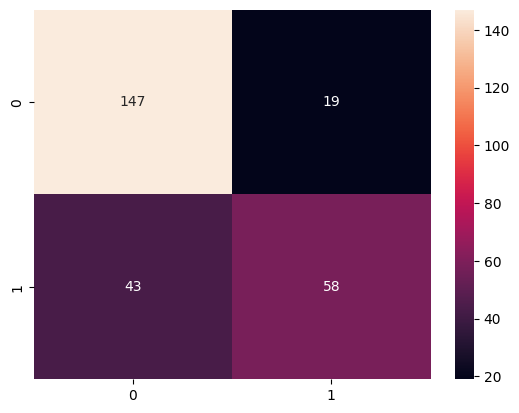

In [ ]:
sns.heatmap(conf_matrix, annot= True, fmt='g')
plt.show()

In [ ]:
# prompt: necesito las metricas para el conjutno de datos de train, accuracy, recall, precision, f1 calcula el predict para X_train

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate accuracy, recall, precision, and f1 score for the training set
accuracy_train = accuracy_score(y_train, rl.predict(X_train))
recall_train = recall_score(y_train, rl.predict(X_train))
precision_train = precision_score(y_train, rl.predict(X_train))
f1_train = f1_score(y_train, rl.predict(X_train))

# Print the results
print("Accuracy (train):", accuracy_train)
print("Recall (train):", recall_train)
print("Precision (train):", precision_train)
print("F1 score (train):", f1_train)

# Predict for X_train
y_pred_train = rl.predict(X_train)


Accuracy (train): 0.8193548387096774
Recall (train): 0.7302904564315352
Precision (train): 0.7892376681614349
F1 score (train): 0.7586206896551723


In [ ]:
# prompt: scame el accuracy y el recall, y otras

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.7677902621722846
Recall: 0.5742574257425742
Precision: 0.7532467532467533
F1 Score: 0.6516853932584269


## Red neuronal

In [ ]:
# prompt: quiero una red neuroanl dense, con 3 capas ocultas 64 neuronas para la primera 32 para la segunda, 16 para la tercera
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.6597
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6790
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6968
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7048
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7161
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7210
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7323
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7484
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7661
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7839
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 56        
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_nn = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
y_pred_nn_r = [1 if prob > 0.5 else 0 for prob in y_pred_nn]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acc = accuracy_score(y_test, y_pred_nn_r )
acc

0.7865168539325843

In [ ]:
confusion = confusion_matrix(y_test, y_pred_nn_r )
confusion

array([[150,  16],
       [ 41,  60]])

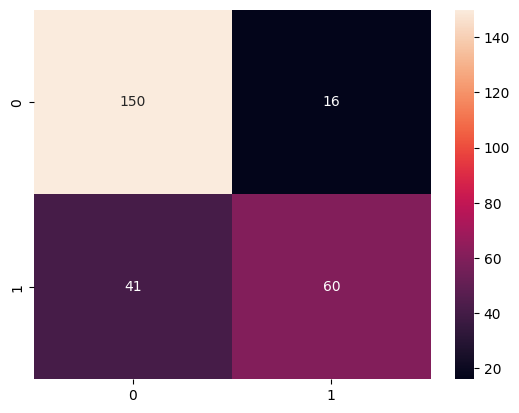

In [ ]:
sns.heatmap(confusion, annot= True, fmt='g')
plt.show()

# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de los píxeles de las imágenes a un valor entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


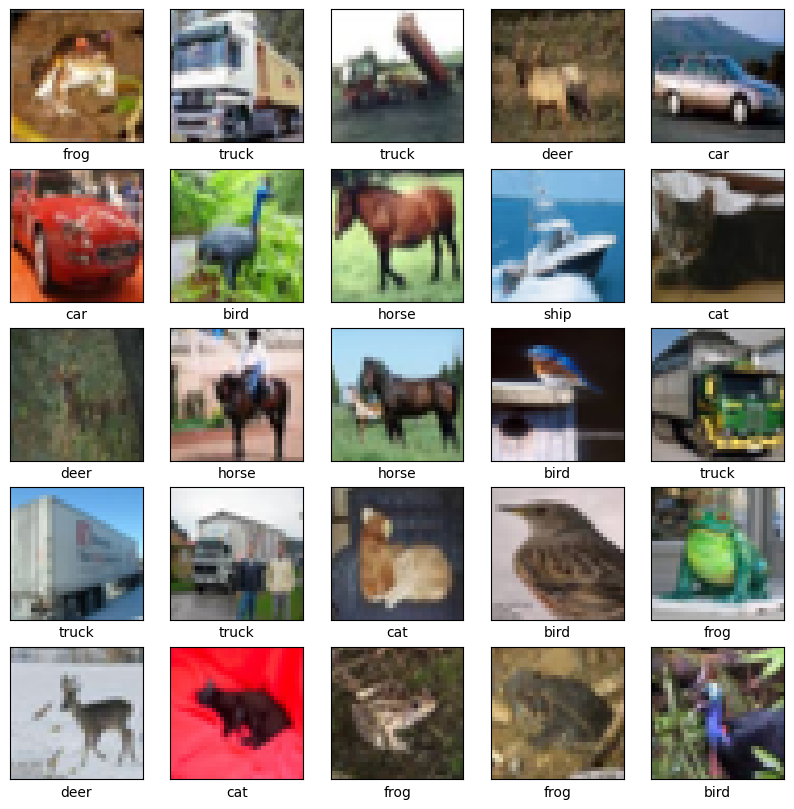

In [ ]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


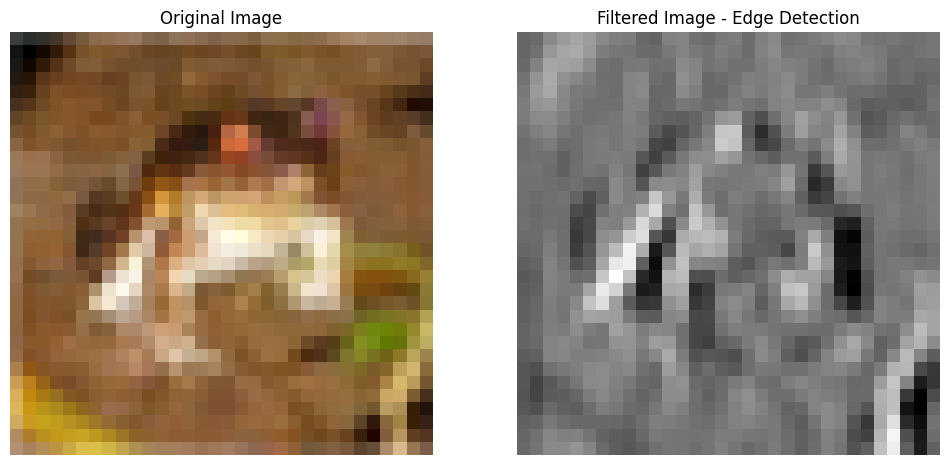

In [ ]:
# Seleccionar una imagen de ejemplo
image = train_images[0]

# Definir un filtro de detección de bordes h
filter = np.array([[ 1,  0, -1],
                   [ 2,  0,  -2],
                   [ 1,  0,  -1]])

# Convertir la imagen a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_image = rgb2gray(image)

# Aplicar el filtro de convolución
filtered_image = convolve(gray_image, filter)

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image - Edge Detection')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()

(-0.5, 31.5, 31.5, -0.5)

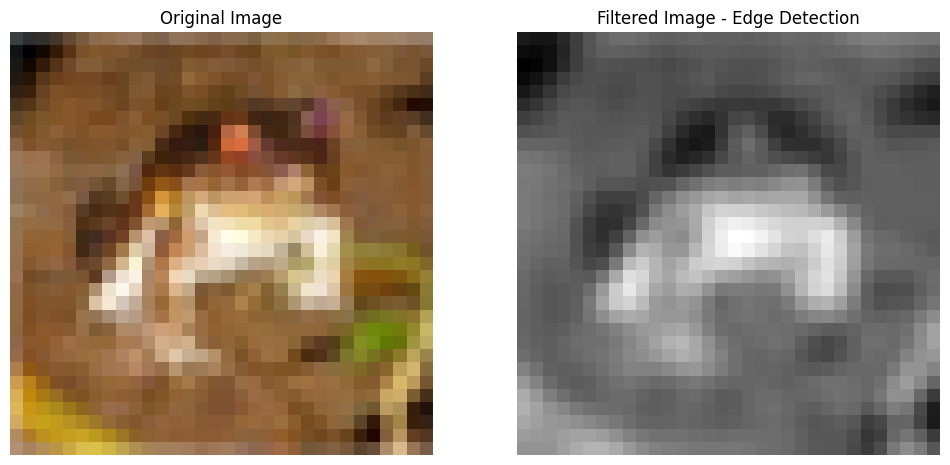

In [ ]:
# Seleccionar una imagen de ejemplo
image = train_images[0]

# Definir un filtro para desenfocar
filter = np.array([[ 1,  1, 1],
                   [ 1,  1,  1],
                   [ 1,  1,  1]]) / 9.0

# Convertir la imagen a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_image = rgb2gray(image)

# Aplicar el filtro de convolución
filtered_image = convolve(gray_image, filter)

# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image - Edge Detection')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
])

# Añadir las capas Dense en la parte superior
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 82s 52ms/step - loss: 1.5196 - accuracy: 0.4486 - val_loss: 1.2506 - val_accuracy: 0.5487
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1718 - accuracy: 0.5828 - val_loss: 1.1273 - val_accuracy: 0.5963
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0204 - accuracy: 0.6415 - val_loss: 0.9762 - val_accuracy: 0.6573
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9194 - accuracy: 0.6769 - val_loss: 0.9364 - val_accuracy: 0.6726
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8431 - accuracy: 0.7022 - val_loss: 0.9077 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7934 - accuracy: 0.7232 - val_loss: 0.9010 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7390 - accuracy: 0.7412 - val_loss: 0.8690 - val_accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Detectar y conectar a una TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

# Verificar la conexión de TPU y listar las TPU disponibles
print("All devices: ", tf.config.list_logical_devices('TPU'))

# Definir y compilar el modelo dentro del ámbito de la estrategia de TPU
with strategy.scope():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
    ])

    # Añadir las capas Dense en la parte superior
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Asegúrate de que tus datos estén listos aquí antes de comenzar el entrenamiento
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 36s 20ms/step - loss: 1.5164 - accuracy: 0.4450 - val_loss: 1.3148 - val_accuracy: 0.5324
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1584 - accuracy: 0.5886 - val_loss: 1.0704 - val_accuracy: 0.6256
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0057 - accuracy: 0.6466 - val_loss: 0.9719 - val_accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9101 - accuracy: 0.6812 - val_loss: 0.9459 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8361 - accuracy: 0.7081 - val_loss: 0.9825 - val_accuracy: 0.6584
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7790 - accuracy: 0.7282 - val_loss: 0.8904 - val_accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7277 - accuracy: 0.7450 - val_loss: 0.9025 - val_accura

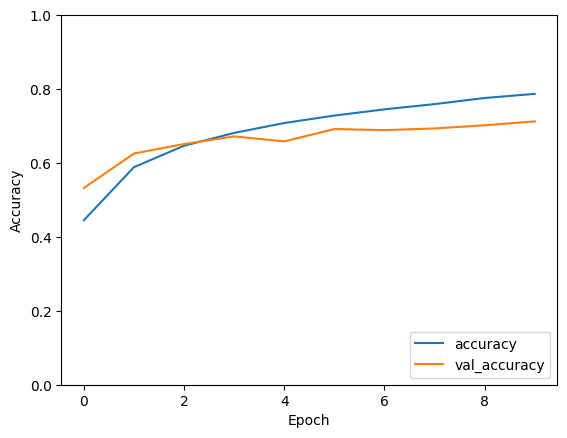

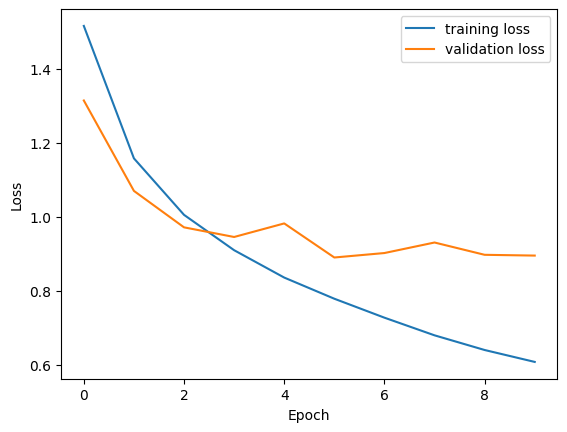

In [ ]:
import matplotlib.pyplot as plt

# Precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Pérdida
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

313/313 [==============================] - 6s 13ms/step


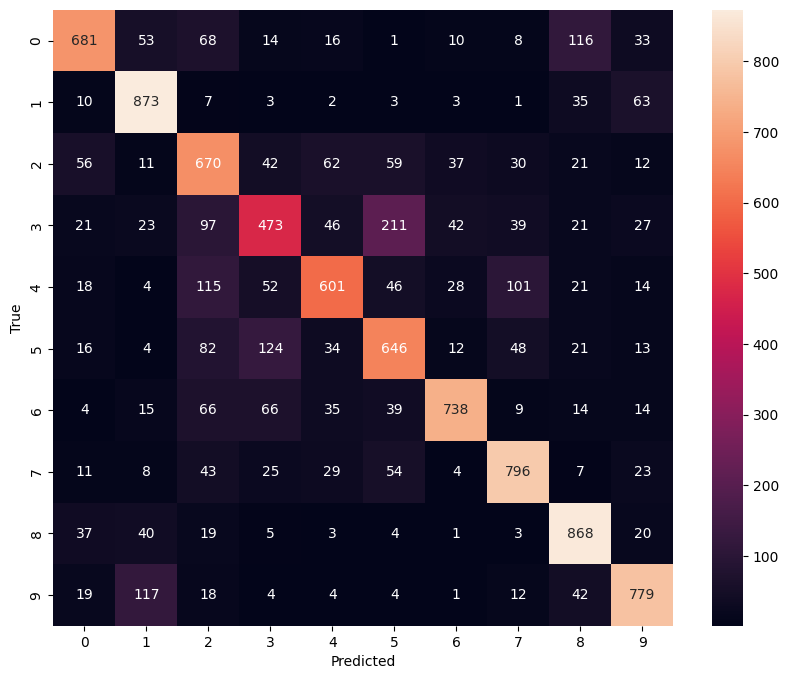

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir las etiquetas para las imágenes en el conjunto de prueba
test_predictions = model.predict(test_images).argmax(axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, test_predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Seleccione una imagen de prueba (por ejemplo, la primera imagen del conjunto de prueba)
test_image = test_images[50]

# Hacer una predicción utilizando el modelo
test_image_expanded = np.expand_dims(test_image, axis=0)  # Expande las dimensiones para incluir un "batch" de 1
prediction = model.predict(test_image_expanded).argmax()
print(f'Predicted label: {prediction}')


1/1 [==============================] - 1s 622ms/step
Predicted label: 9


(-0.5, 31.5, 31.5, -0.5)

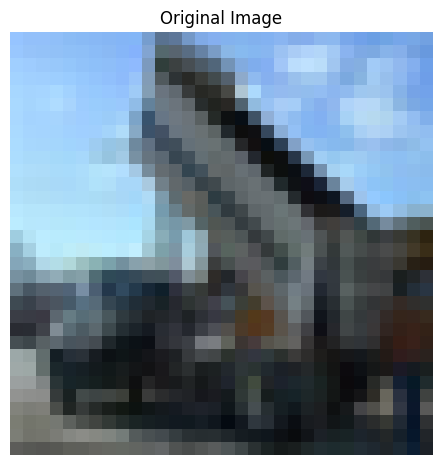

In [ ]:
# Mostrar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(test_image)
plt.axis('off')

In [ ]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

1/1 [==============================] - 1s 600ms/step
Predicted label: Perro


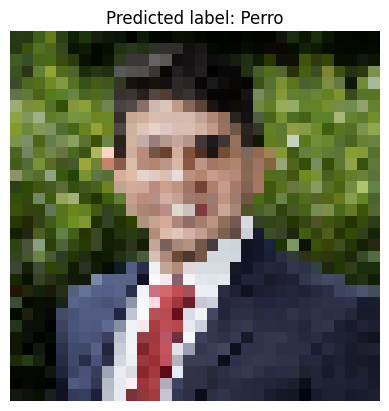

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Definir un diccionario para mapear los índices de las etiquetas a los nombres de las clases
class_names = ['Avión', 'Automóvil', 'Ave', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(path_to_image):
    img = image.load_img(path_to_image, target_size=(32, 32))  # Cargar la imagen y cambiar el tamaño a 32x32
    img_array = image.img_to_array(img)  # Convertir a un array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Añadir un eje para batch_size
    img_array /= 255.0  # Normalizar la imagen
    return img_array, img

# Ruta a la imagen que se va a cargar
path_to_image = 'heber_bermudez.jpg'

# Cargar y preprocesar la imagen
img_to_predict, img = load_and_preprocess_image(path_to_image)

# Hacer la predicción
prediction = model.predict(img_to_predict).argmax()
predicted_class_name = class_names[prediction]

# Imprimir y mostrar la imagen y la etiqueta
print(f'Predicted label: {predicted_class_name}')
plt.imshow(img)
plt.title(f'Predicted label: {predicted_class_name}')
plt.axis('off')  # Ocultar los ejes
plt.show()